# Bank Customer Segmentation

- In this kernel I will perform segmentation of German bank customers. 
- Age (numeric)
- Sex (text: male, female)
- Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 skilled, 3 - highly skilled)
- Housing (text: own, rent, or free)
- Saving accounts (text - little, moderate, quite rich, rich)
- Checking account (numeric, in DM - Deutsch Mark)
- Credit amount (numeric, in DM)
- Duration (numeric, in month)
- Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Reading the raw data 

In [ ]:
data = pd.read_csv("german_credit_data.csv")

In [ ]:
data.head()

In [ ]:
data.drop(data.columns[0],axis=1,inplace=True)

In [ ]:
data.shape

In [ ]:
data.describe()

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
data[data.duplicated()]

In [ ]:
for col in data.select_dtypes(object):
    print('{} : {}'.format(col,data[col].unique()))

In [ ]:
data.columns

In [ ]:
sns.scatterplot(data=data,x='Age',y='Duration',hue='Housing')

In [ ]:
sns.scatterplot(data=data,x='Age',y='Credit amount',hue='Housing')

In [ ]:
sns.scatterplot(data=data,x='Credit amount',y='Duration',hue='Sex')

In [ ]:
sns.histplot(data['Duration'])
#Credit amount', 'Duration'

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data['Purpose'],hue=data['Sex'])

In [ ]:
data.groupby('Sex').count()

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data,x='Job',y='Credit amount',hue='Sex')

In [ ]:
sns.heatmap(data.corr(),annot=True)

In [ ]:
data.columns

In [ ]:
selected_col=['Age','Credit amount', 'Duration']
cluster_data=data.loc[:,selected_col]

In [ ]:
cluster_log=np.log(cluster_data)

In [ ]:
sns.histplot(data['Age'])

In [ ]:
sns.histplot(cluster_log['Age'])

In [54]:
scaler=StandardScaler()
cluster_scaled=scaler.fit_transform(cluster_log)

In [55]:
cluster_range=list(range(1,15))
SSE=[]
for i in cluster_range:
    km=KMeans(n_clusters=i).fit(cluster_scaled)
    SSE.append(km.inertia_)
    

c:\Users\Emy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Emy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Emy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Emy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with M

In [56]:
SSE

[3000.0000000000005,
 1908.8110804673886,
 1437.7121564091672,
 1199.4390496918927,
 1028.6702930349882,
 932.1083207702333,
 838.7003763108008,
 761.7659475365808,
 714.8086968587671,
 669.7540498825771,
 627.8329833401826,
 595.3703981126143,
 565.0318046455112,
 537.8831554317973]

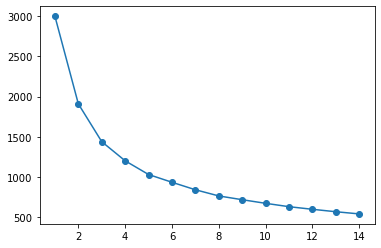

In [58]:
plt.plot(cluster_range,SSE,marker='o')

In [59]:
km=KMeans(n_clusters=3).fit(cluster_scaled)

c:\Users\Emy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [61]:
labels=pd.DataFrame(km.labels_)
clustered_data=cluster_data.assign(Cluster=labels)
clustered_data

,Age,Credit amount,Duration,Cluster
0,67,1169,6,2
1,22,5951,48,1
2,49,2096,12,2
3,45,7882,42,1
4,53,4870,24,1
...,...,...,...,...
995,31,1736,12,0
996,40,3857,30,1
997,38,804,12,2
998,23,1845,45,1


In [62]:
clustered_data.groupby('Cluster').mean()

,Age,Credit amount,Duration
Cluster,,,
0,27.784153,1732.199454,14.245902
1,34.042667,5665.384000,32.224000
2,48.691120,1979.745174,13.918919


<AxesSubplot:xlabel='Credit amount', ylabel='Age'>

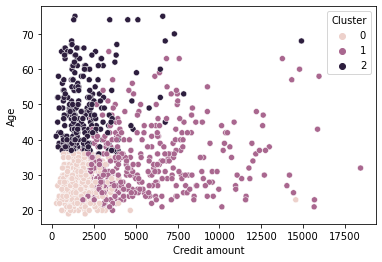

In [64]:
sns.scatterplot(data=clustered_data,x='Credit amount',y='Age',hue='Cluster')